In [2]:
import numpy as np
from numpy import linalg 
from matplotlib import cm
from matplotlib import pyplot as plt
from scipy.optimize import minimize

y = np.linspace(-2,2,401) # spatial coordinate
Ny = np.size(y)

amp1 = 1
y01 = 0.5
sigmay1 = 0.6

amp2 = 1.2
y02 = -0.5
sigmay2 = 0.3

dt = 0.1
Nt = 101
tend = dt*(Nt-1)
t = np.linspace(0,tend,Nt) # time

omega1 = 1.3
omega2 = 4.1

v1 = amp1*np.exp(-((y-y01)**2)/(2*sigmay1**2))
v2 = amp2*np.exp(-((y-y02)**2)/(2*sigmay2**2))

X = np.zeros([Ny,Nt],dtype=complex)
for tt in range(Nt):
    X[:,tt] = v1*np.exp(1j*omega1*t[tt])+v2*np.exp(1j*omega2*t[tt]) 

In [7]:
np.linalg.matrix_rank(X)

2

## Problem (a）

In [4]:
U,S,VT = linalg.svd(X)
print(f"Shape of X {X.shape}")
print(f"Shape of U {U.shape}")
print(f"Shape of S {S.shape}")
print(f"Shape of V {VT.T.shape}")

Shape of X (401, 101)
Shape of U (401, 401)
Shape of S (101,)
Shape of V (101, 101)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


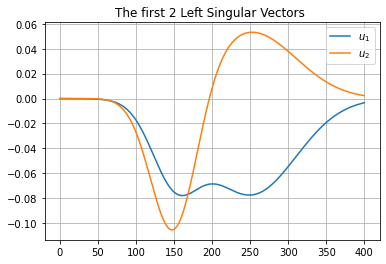

In [5]:
U2 = U[:,0:2]
fig = plt.figure(1)
i = 0 
for u in range(2):
    plt.plot(U2[:,i],label= r"$u_{}$".format(i+1))
    i+=1
plt.grid()
plt.legend()
plt.title("The first 2 Left Singular Vectors ")
plt.show()

Text(0.5, 1.0, 'Singular Values')

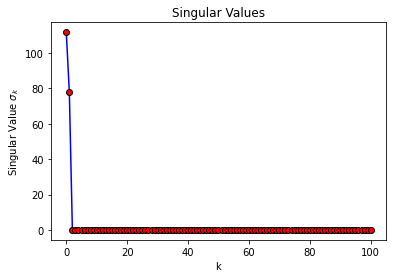

In [6]:
plt.plot(S,"-o",c='blue', mfc='red', mec='k')
plt.xlabel(r"k")
plt.ylabel(r"Singular Value ${{\sigma}_{k}}$")
plt.title("Singular Values")

__The reason why only first 2 singular value is large is that the rank of matrix is 2__

# Problem (b)

## Defining DMD function

In [ ]:
def DMD(data,rank:int):
    